<h1>Load Tokenizer and Instantiate Model</h1>

In [1]:
from transformer_model import TransformerLanguageModel
import torch
import sentencepiece as spm
from transformers import BertTokenizer  # Or any other tokenizer you prefer

# Trained tokenizer
sp = spm.SentencePieceProcessor()
model_prefix = "bpe_tokenizer"
sp.load(f'{model_prefix}.model')
tokenizer = sp

device = "mps"

<h1>Instantiate New Model</h1>

Uncomment the code below to train a new model

In [2]:
transformer_model = TransformerLanguageModel(tokenizer.get_piece_size())
transformer_model.to(device)

TransformerLanguageModel(
  (token_embedding): Embedding(10000, 360)
  (positional_encoding): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=360, out_features=360, bias=True)
    )
    (linear1): Linear(in_features=360, out_features=512, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=512, out_features=360, bias=True)
    (norm1): LayerNorm((360,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((360,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=360, out_features=360, 

<h1>Load Model</h1>

Uncomment the code below to use the pre-existing model parameters

In [3]:
# import torch
# import sentencepiece as spm
# from pathlib import Path

# MODEL_PATH = Path("models")
# MODEL_NAME = "transformer_language_model.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# transformer_model = TransformerLanguageModel(sp.get_piece_size()).to("mps")

# # Load the saved state_dict of module_0 
# transformer_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<h1>Train Model</h1>

In [4]:
from textdataset import TextDataSet
import os

training_losses, validation_losses = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).train_model(transformer_model, epochs=50)

Epoch 1, Training Loss: 6.8453 | Validation loss: 6.2613
Epoch 2, Training Loss: 6.0631 | Validation loss: 5.8805
Epoch 3, Training Loss: 5.7973 | Validation loss: 5.6956
Epoch 4, Training Loss: 5.6429 | Validation loss: 5.5763
Epoch 5, Training Loss: 5.5354 | Validation loss: 5.4926
Epoch 6, Training Loss: 5.4525 | Validation loss: 5.4283
Epoch 7, Training Loss: 5.3841 | Validation loss: 5.3766
Epoch 8, Training Loss: 5.3250 | Validation loss: 5.3316
Epoch 9, Training Loss: 5.2720 | Validation loss: 5.2914
Epoch 10, Training Loss: 5.2232 | Validation loss: 5.2571
Epoch 11, Training Loss: 5.1795 | Validation loss: 5.2286
Epoch 12, Training Loss: 5.1376 | Validation loss: 5.1982
Epoch 13, Training Loss: 5.0984 | Validation loss: 5.1714
Epoch 14, Training Loss: 5.0611 | Validation loss: 5.1487
Epoch 15, Training Loss: 5.0258 | Validation loss: 5.1275
Epoch 16, Training Loss: 4.9942 | Validation loss: 5.1092
Epoch 17, Training Loss: 4.9638 | Validation loss: 5.0914
Epoch 18, Training Loss

<h1>Visualize</h1>

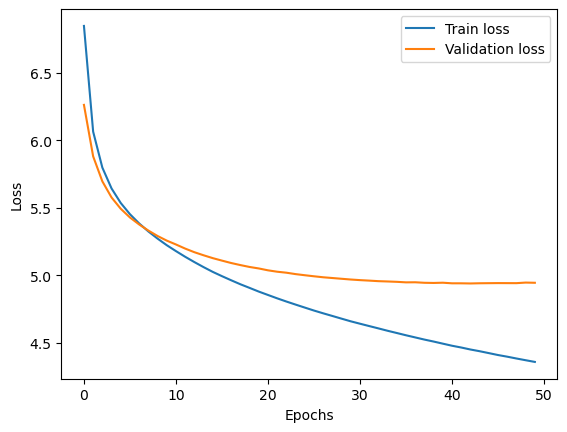

In [5]:
import matplotlib.pyplot as plt
# plot the loss curves
plt.plot(training_losses, label="Train loss")
plt.plot(validation_losses, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

<h1>Save Model</h1>

In [6]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "transformer_language_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
torch.save(obj=transformer_model.state_dict(),f=MODEL_SAVE_PATH)
print("saving complete")

saving complete


<h1>Evaluate Model</h1>

In [9]:
from textdataset import TextDataSet
import os

tds = TextDataSet(os.getcwd()+"/data/train.jsonl", sp).evalutate_model(transformer_model)

Perplexity: 140.4729461669922 | Bleu score: 0.006794723614329385


<h1>Generate from prompts</h1>

In [10]:
# Example usage of the generate method
prompt = "Will I pass this class?"
generated_text = transformer_model.generate(sp, prompt, max_length=50, eos_token_id=0, temperature=0.9, device="mps")
print(f"Generated text: {generated_text}")

Generated text: Then he said the letter. The highest degree; Almightys of that on a profession. The chiefs, do, who has the foe the city. I must meet here. I know of her position, it. Pty. I a good
